In [1]:
import pandas as pd

# 데이터셋 불러오기
medical_df = pd.read_csv('./datasets/medical_dataset.csv')
lifestyle_df = pd.read_csv('./datasets/lifestyle_dataset.csv')

# PatientID를 key로 두 데이터셋 합치기
heart_df = pd.merge(medical_df, lifestyle_df, on='PatientID')
heart_df


,BMI,Stroke,PhysicalHealth,AgeCategory,MentalHealth,DiffWalking,Diabetic,GenHealth,Asthma,KidneyDisease,SkinCancer,HeartDisease,Sex,PatientID,Smoking,AlcoholDrinking,PhysicalActivity,SleepTime,Race
0,16.60,No,3.0,55-59,30.0,No,Yes,Very good,Yes,No,Yes,No,Female,367841,Yes,No,Yes,5.0,White
1,20.34,Yes,0.0,80 or older,0.0,No,No,Very good,No,No,No,No,Female,375880,No,No,Yes,7.0,White
2,26.58,No,20.0,65-69,30.0,No,Yes,Fair,Yes,No,No,No,Male,235382,Yes,No,Yes,8.0,White
3,24.21,No,0.0,75-79,0.0,No,No,Good,No,No,Yes,No,Female,267437,No,No,No,6.0,White
4,23.71,No,28.0,40-44,0.0,Yes,No,Very good,No,No,No,No,Female,332825,No,No,Yes,8.0,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,No,7.0,60-64,0.0,Yes,Yes,Fair,Yes,No,No,Yes,Male,145205,Yes,No,No,6.0,Hispanic
319791,29.84,No,0.0,35-39,0.0,No,No,Very good,Yes,No,No,No,Male,409347,Yes,No,Yes,5.0,Hispanic
319792,24.24,No,0.0,45-49,0.0,No,No,Good,No,No,No,No,Female,335808,No,No,Yes,6.0,Hispanic
319793,32.81,No,0.0,25-29,0.0,No,No,Good,No,No,No,No,Female,414151,No,No,No,12.0,Hispanic


In [2]:
import pandas as pd

# 결측치 확인 
print(heart_df.isnull().sum())

# 중복행 확인
print(heart_df.duplicated().sum())

BMI                 0
Stroke              0
PhysicalHealth      0
AgeCategory         0
MentalHealth        0
DiffWalking         0
Diabetic            0
GenHealth           0
Asthma              0
KidneyDisease       0
SkinCancer          0
HeartDisease        0
Sex                 0
PatientID           0
Smoking             0
AlcoholDrinking     0
PhysicalActivity    0
SleepTime           0
Race                0
dtype: int64
0


In [3]:
heart_df = heart_df.drop(columns=['PatientID'])


In [4]:
import pandas as pd

heart_disease_counts = heart_df['HeartDisease'].value_counts()

# 결과 출력
print(heart_disease_counts)


HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64


array([[<Axes: title={'center': 'PhysicalHealth'}>,
        <Axes: title={'center': 'MentalHealth'}>],
       [<Axes: title={'center': 'SleepTime'}>, <Axes: >]], dtype=object)

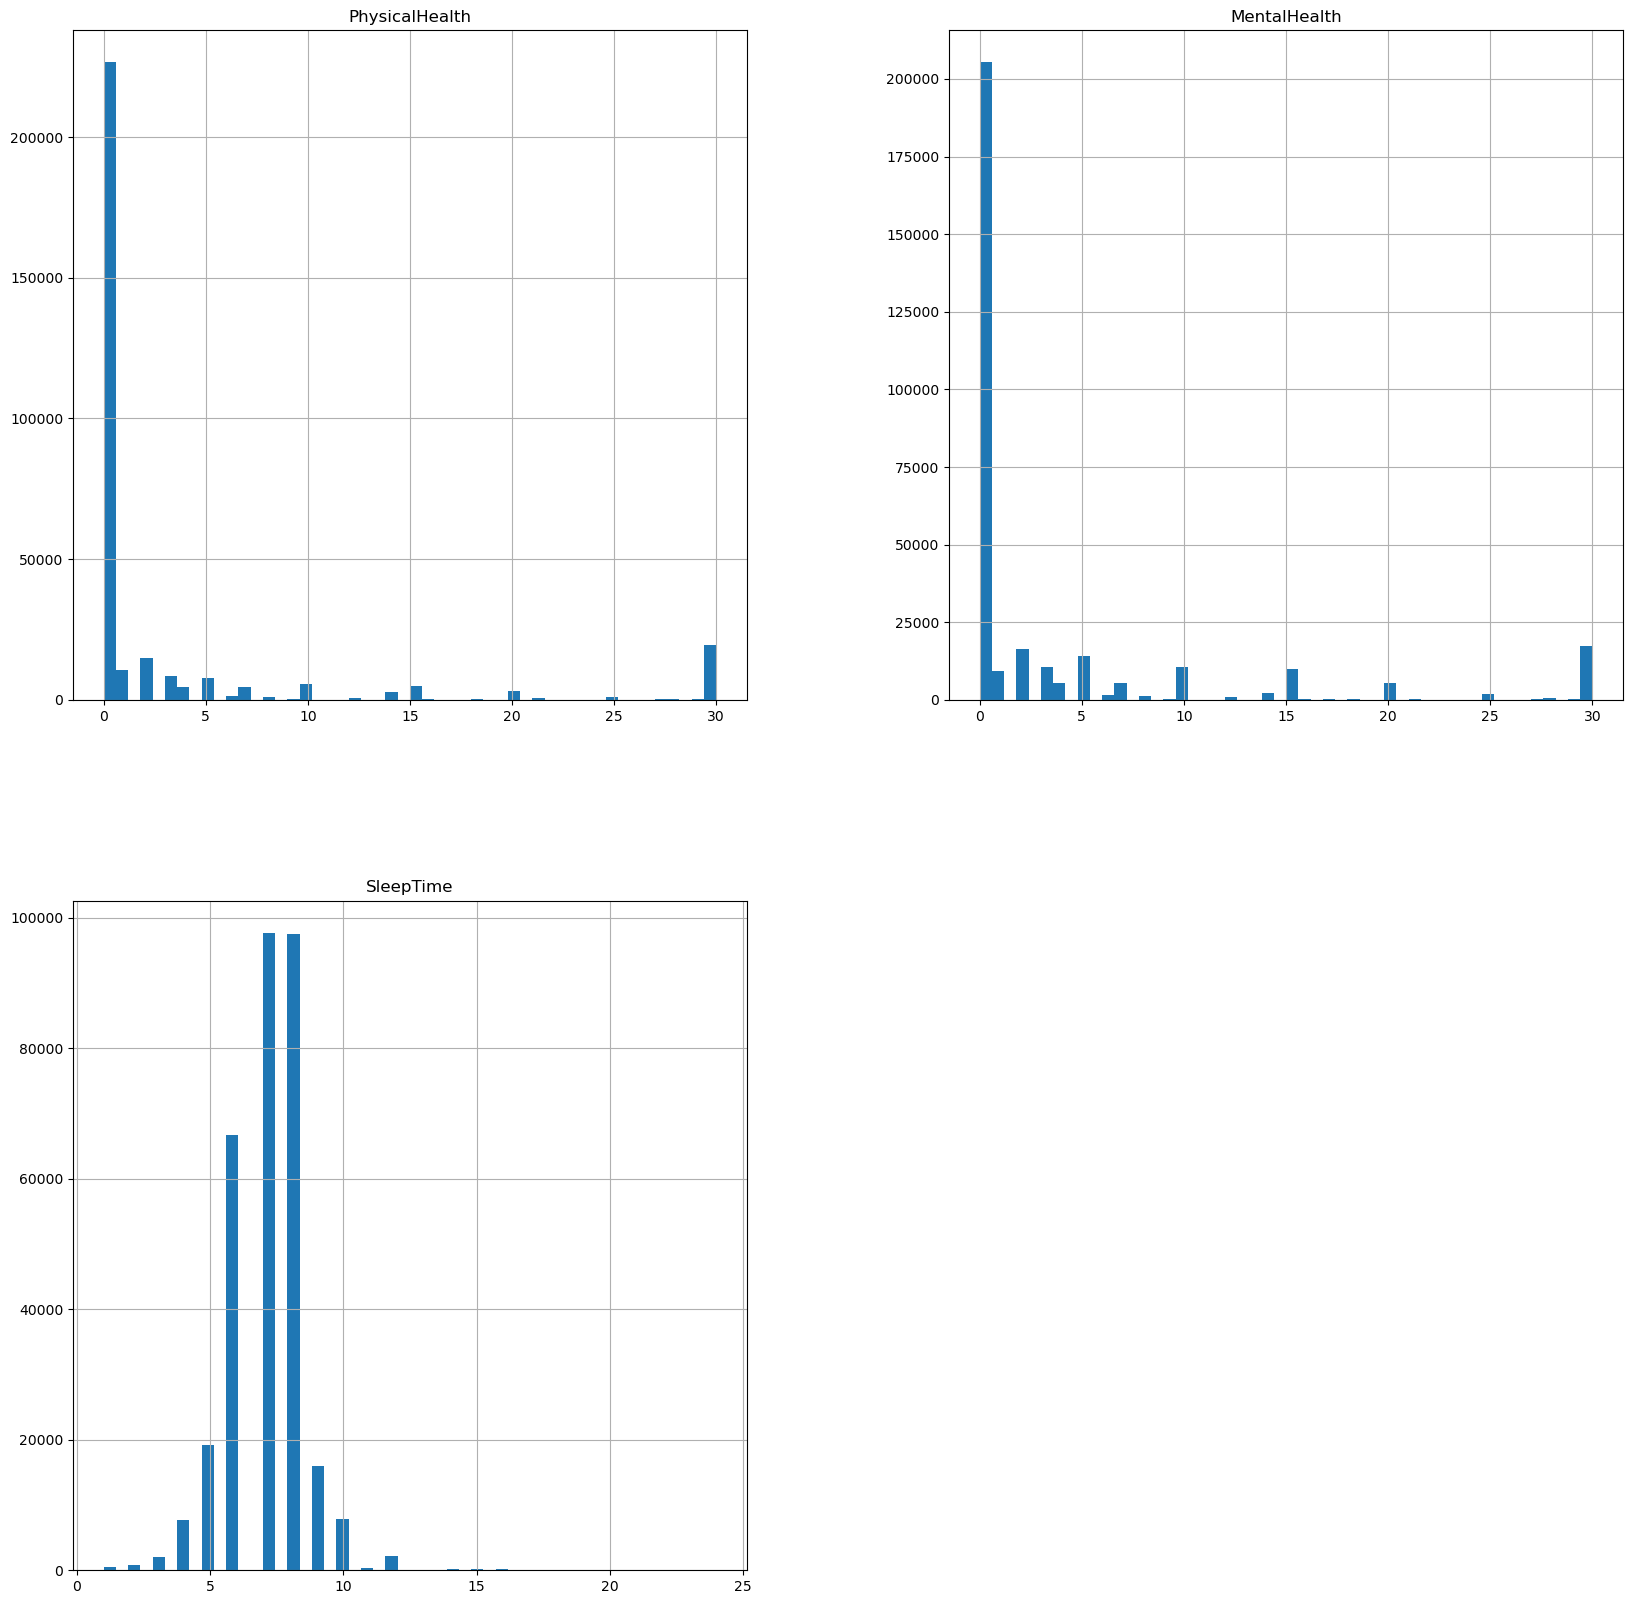

In [5]:
heart_df.iloc[:, 1:].hist(figsize=(20, 20), bins=50)

In [6]:
# 언더 샘플링
yes_samples = heart_df[heart_df['HeartDisease'] == 'Yes'].sample(n=2000, random_state=42)
no_samples = heart_df[heart_df['HeartDisease'] == 'No'].sample(n=2000, random_state=42)

# 랜덤 샘플링한 데이터를 하나의 데이터프레임으로 합치기
heart_df = pd.concat([yes_samples, no_samples])

# 결과 출력
heart_disease_counts = heart_df['HeartDisease'].value_counts()

# 결과 출력
print(heart_disease_counts)

HeartDisease
Yes    2000
No     2000
Name: count, dtype: int64


In [7]:
heart_df = heart_df.reset_index(drop=True)
heart_df

,BMI,Stroke,PhysicalHealth,AgeCategory,MentalHealth,DiffWalking,Diabetic,GenHealth,Asthma,KidneyDisease,SkinCancer,HeartDisease,Sex,Smoking,AlcoholDrinking,PhysicalActivity,SleepTime,Race
0,25.61,Yes,30.0,50-54,30.0,No,No,Poor,No,No,Yes,Yes,Female,Yes,No,Yes,3.0,Asian
1,27.12,No,3.0,75-79,0.0,No,"No, borderline diabetes",Good,No,No,No,Yes,Male,Yes,No,Yes,7.0,White
2,30.90,Yes,4.0,70-74,30.0,Yes,Yes,Fair,Yes,Yes,No,Yes,Female,No,No,No,7.0,White
3,27.46,No,0.0,70-74,0.0,No,Yes,Excellent,No,No,No,Yes,Female,No,No,Yes,8.0,White
4,26.63,No,0.0,80 or older,0.0,No,No,Excellent,No,No,Yes,Yes,Male,Yes,No,No,5.0,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,24.37,No,1.0,45-49,13.0,No,No,Excellent,No,No,No,No,Male,No,No,Yes,8.0,White
3996,26.61,No,0.0,30-34,0.0,No,No,Very good,No,No,No,No,Male,Yes,No,Yes,8.0,White
3997,21.93,No,0.0,45-49,0.0,No,No,Good,No,No,No,No,Female,No,No,No,6.0,White
3998,53.09,No,0.0,50-54,0.0,No,No,Good,No,No,No,No,Male,No,No,Yes,7.0,White


In [8]:
column_counts = heart_df.nunique()
column_counts

BMI                 1079
Stroke                 2
PhysicalHealth        29
AgeCategory           13
MentalHealth          28
DiffWalking            2
Diabetic               4
GenHealth              5
Asthma                 2
KidneyDisease          2
SkinCancer             2
HeartDisease           2
Sex                    2
Smoking                2
AlcoholDrinking        2
PhysicalActivity       2
SleepTime             19
Race                   6
dtype: int64

In [9]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BMI               4000 non-null   float64
 1   Stroke            4000 non-null   object 
 2   PhysicalHealth    4000 non-null   float64
 3   AgeCategory       4000 non-null   object 
 4   MentalHealth      4000 non-null   float64
 5   DiffWalking       4000 non-null   object 
 6   Diabetic          4000 non-null   object 
 7   GenHealth         4000 non-null   object 
 8   Asthma            4000 non-null   object 
 9   KidneyDisease     4000 non-null   object 
 10  SkinCancer        4000 non-null   object 
 11  HeartDisease      4000 non-null   object 
 12  Sex               4000 non-null   object 
 13  Smoking           4000 non-null   object 
 14  AlcoholDrinking   4000 non-null   object 
 15  PhysicalActivity  4000 non-null   object 
 16  SleepTime         4000 non-null   float64


In [10]:
from sklearn.preprocessing import LabelEncoder

# HeartDisease 데이터프레임에서 객체 타입 컬럼 선택
obj_columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

# 레이블 인코더 초기화
encoders = []

# 레이블 인코딩 수행
for column in obj_columns:
    encoder = LabelEncoder()
    heart_df[column] = encoder.fit_transform(heart_df[column].tolist())
    encoders.append(encoder)
    print(encoder.classes_)


['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Female' 'Male']
['18-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59' '60-64'
 '65-69' '70-74' '75-79' '80 or older']
['American Indian/Alaskan Native' 'Asian' 'Black' 'Hispanic' 'Other'
 'White']
['No' 'No, borderline diabetes' 'Yes' 'Yes (during pregnancy)']
['No' 'Yes']
['Excellent' 'Fair' 'Good' 'Poor' 'Very good']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']


<Axes: >

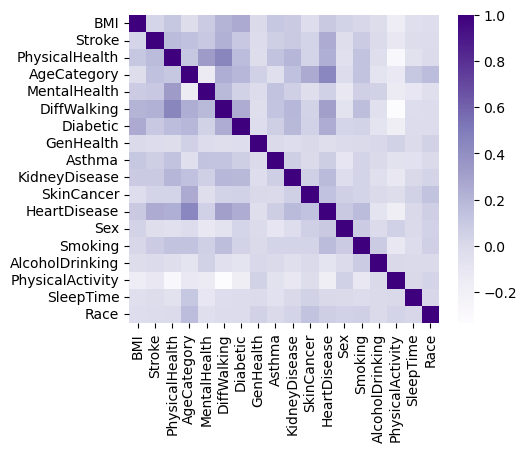

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 4))
correlation_matrix = heart_df.corr()
sns.heatmap(correlation_matrix, cmap="Purples")

In [12]:
correlation_with_heart_disease = heart_df.corr()['HeartDisease']
print(correlation_with_heart_disease)

BMI                 0.096018
Stroke              0.250147
PhysicalHealth      0.239076
AgeCategory         0.443043
MentalHealth        0.056896
DiffWalking         0.308511
Diabetic            0.249361
GenHealth          -0.032232
Asthma              0.076805
KidneyDisease       0.181134
SkinCancer          0.139001
HeartDisease        1.000000
Sex                 0.095586
Smoking             0.175500
AlcoholDrinking    -0.083140
PhysicalActivity   -0.174041
SleepTime           0.007141
Race                0.066313
Name: HeartDisease, dtype: float64


array([[<Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'PhysicalHealth'}>,
        <Axes: title={'center': 'AgeCategory'}>,
        <Axes: title={'center': 'MentalHealth'}>],
       [<Axes: title={'center': 'DiffWalking'}>,
        <Axes: title={'center': 'Diabetic'}>,
        <Axes: title={'center': 'GenHealth'}>,
        <Axes: title={'center': 'Asthma'}>],
       [<Axes: title={'center': 'KidneyDisease'}>,
        <Axes: title={'center': 'SkinCancer'}>,
        <Axes: title={'center': 'HeartDisease'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Smoking'}>,
        <Axes: title={'center': 'AlcoholDrinking'}>,
        <Axes: title={'center': 'PhysicalActivity'}>,
        <Axes: title={'center': 'SleepTime'}>],
       [<Axes: title={'center': 'Race'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

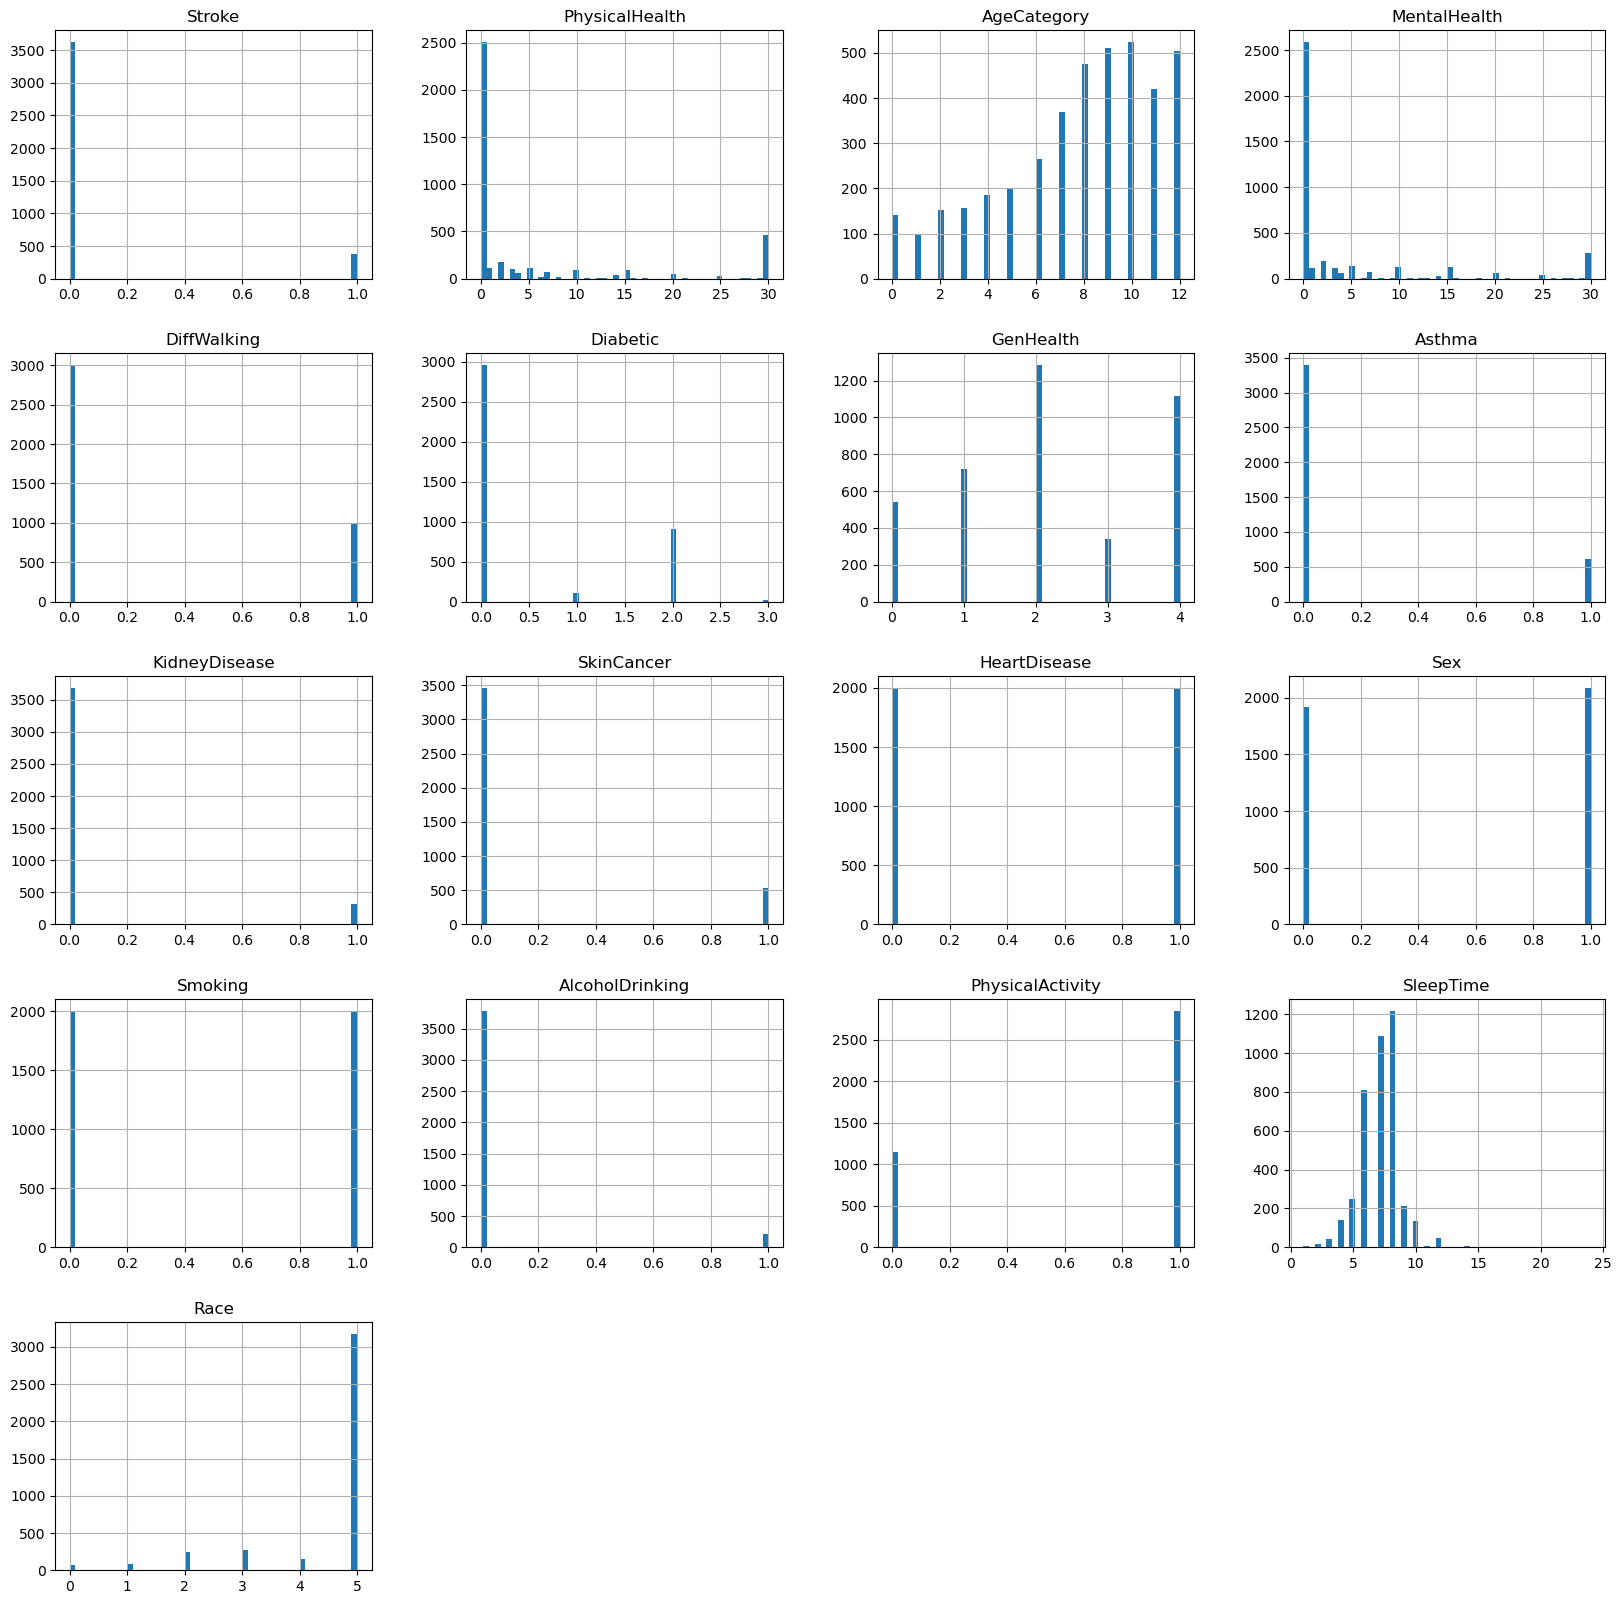

In [13]:
heart_df.iloc[:, 1:].hist(figsize=(20, 20), bins=50)

In [14]:
import pandas as pd

heart_disease_counts = heart_df['HeartDisease'].value_counts()

# 결과 출력
print(heart_disease_counts)


HeartDisease
1    2000
0    2000
Name: count, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split

# 'HeartDisease' 열을 목표 변수로 사용하여 데이터를 나눕니다.
X = heart_df.drop(columns=['HeartDisease'])
y = heart_df['HeartDisease']

# 트레이닝 세트와 테스트 세트로 데이터를 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train, y_train은 트레이닝 데이터의 특성과 목표 변수입니다.
# X_test, y_test은 테스트 데이터의 특성과 목표 변수입니다.
X_test

,BMI,Stroke,PhysicalHealth,AgeCategory,MentalHealth,DiffWalking,Diabetic,GenHealth,Asthma,KidneyDisease,SkinCancer,Sex,Smoking,AlcoholDrinking,PhysicalActivity,SleepTime,Race
555,36.81,0,25.0,8,10.0,1,0,1,0,0,0,0,1,0,0,5.0,5
3491,20.01,0,0.0,9,0.0,0,0,4,0,0,1,0,0,0,1,7.0,5
527,21.83,0,5.0,8,0.0,1,0,3,1,0,0,1,1,0,1,6.0,5
3925,24.37,0,15.0,9,0.0,0,1,4,0,1,1,1,0,1,1,7.0,5
2989,33.47,0,0.0,6,0.0,0,0,0,0,0,0,1,0,0,1,8.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922,27.71,0,0.0,9,10.0,0,0,2,0,0,0,1,1,0,1,6.0,5
865,35.87,0,0.0,11,25.0,1,2,1,0,0,0,0,1,0,0,8.0,5
3943,29.29,0,0.0,5,10.0,0,0,4,0,0,0,1,0,0,0,7.0,5
1642,29.26,0,5.0,4,5.0,0,0,2,0,0,0,0,1,0,1,6.0,2


In [16]:
# # 트레이닝 데이터와 테스트 데이터로 분리
# train_df = heart_df.dropna(subset=['HeartDisease'])
# test_df = heart_df[heart_df['HeartDisease'].isnull()].drop(columns=['HeartDisease'])

# # 트레이닝 데이터에서 특성과 목표 변수 분리
# X_train = train_df.drop(columns=['HeartDisease'])
# y_train = train_df['HeartDisease']

# # 테스트 데이터에서 특성만 추출 (목표 변수는 없음)
# X_test = test_df

# test_df


In [17]:
import pandas as pd

heart_disease_counts = heart_df['HeartDisease'].value_counts()

# 결과 출력
print(heart_disease_counts)


HeartDisease
1    2000
0    2000
Name: count, dtype: int64


In [18]:
# pip install --upgrade scikit-learn

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 하이퍼 파라미터 튜닝
dt_params = {'max_depth': [5, 6, 7], 'min_samples_split': [7, 8, 9]}
svm_params = {'C': [0.01, 0.1, 1, 10],
             'gamma': [0.01, 0.1, 1, 10],
             'kernel': ['linear', 'rbf']}
knn_params = {'n_neighbors': [3, 5, 7]}

# 개별 모델 정의
grid_dt_classifier = GridSearchCV(DecisionTreeClassifier(), param_grid=dt_params, cv=3, refit=True, return_train_score=True, error_score='raise')
grid_svc_classifier = GridSearchCV(SVC(probability=True), param_grid=svm_params, cv=3, refit=True, return_train_score=True, error_score='raise')
grid_knn_classifier = GridSearchCV(KNeighborsClassifier(), param_grid=knn_params, cv=3, refit=True, return_train_score=True, error_score='raise')

# VotingClassifier 정의
voting_classifier = VotingClassifier(estimators=[('DTC', grid_dt_classifier),
                                                 ('SVC', grid_svc_classifier),
                                                 ('KNN', grid_knn_classifier)],
                                     voting='soft')

# 훈련 데이터를 사용하여 앙상블 모델 훈련
voting_classifier.fit(X_train, y_train)

# 테스트 데이터를 사용하여 예측 수행
test_predictions = voting_classifier.predict(X_test)


In [20]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

# DecisionTreeClassifier
오차 행렬
[[263 115]
 [113 309]]
정확도: 0.7150, 정밀도: 0.7288, 재현율: 0.7322, F1:0.7305, AUC:0.7140
###########################################################################


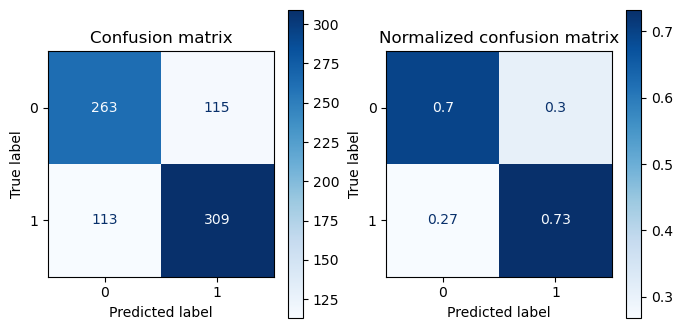

# SVC
오차 행렬
[[263 115]
 [ 97 325]]
정확도: 0.7350, 정밀도: 0.7386, 재현율: 0.7701, F1:0.7541, AUC:0.7330
###########################################################################


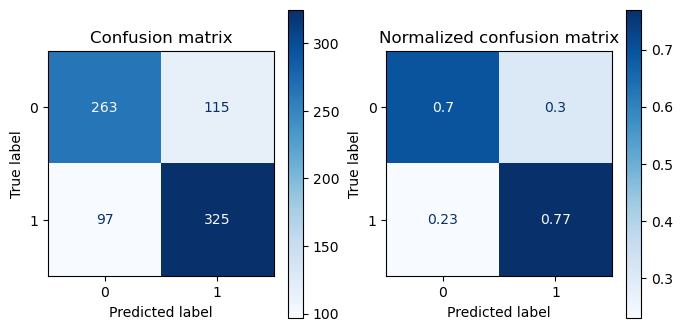

# KNeighborsClassifier
오차 행렬
[[253 125]
 [120 302]]
정확도: 0.6937, 정밀도: 0.7073, 재현율: 0.7156, F1:0.7114, AUC:0.6925
###########################################################################


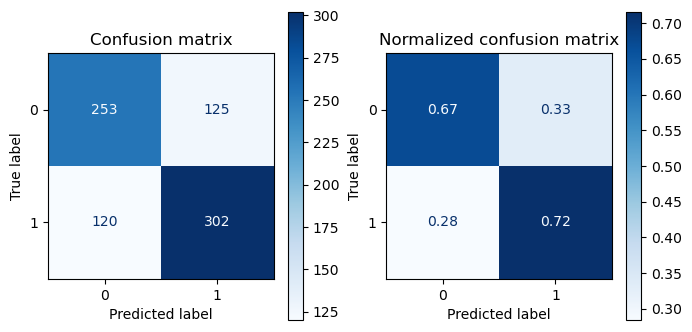

In [21]:
# 개별 모델의 학습/예측/평가.
classifiers = [grid_dt_classifier, grid_svc_classifier, grid_knn_classifier]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    prediction = classifier.predict(X_test)
    class_name= classifier.best_estimator_.__class__.__name__
    print(f'# {class_name}')
    get_evaluation(y_test, prediction, classifier, X_test)

In [22]:
def get_evaluation_by_thresholds(y_test, prediction_proba_class1, thresholds):
    
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold).fit(prediction_proba_class1) 
        custom_prediction = binarizer.transform(prediction_proba_class1)
        print('임곗값:', threshold)
        get_evaluation(y_test, custom_prediction)


In [23]:
from sklearn.preprocessing import Binarizer
from sklearn.metrics import precision_recall_curve

prediction_prob = grid_svc_classifier.predict_proba(X_test)
prediction_prob_class1 = prediction_prob[:, 1].reshape(-1, 1)
precision, recall, thresholds = precision_recall_curve(y_test, prediction_prob_class1)
get_evaluation_by_thresholds(y_test, prediction_prob_class1, thresholds)

임곗값: 0.01376185492943079
오차 행렬
[[  1 377]
 [  0 422]]
정확도: 0.5288, 정밀도: 0.5282, 재현율: 1.0000, F1:0.6912, AUC:0.5013
###########################################################################
임곗값: 0.014309315061048712
오차 행렬
[[  2 376]
 [  0 422]]
정확도: 0.5300, 정밀도: 0.5288, 재현율: 1.0000, F1:0.6918, AUC:0.5026
###########################################################################
임곗값: 0.014771355107145966
오차 행렬
[[  3 375]
 [  0 422]]
정확도: 0.5312, 정밀도: 0.5295, 재현율: 1.0000, F1:0.6924, AUC:0.5040
###########################################################################
임곗값: 0.015222631787341654
오차 행렬
[[  4 374]
 [  0 422]]
정확도: 0.5325, 정밀도: 0.5302, 재현율: 1.0000, F1:0.6929, AUC:0.5053
###########################################################################
임곗값: 0.01811960013091406
오차 행렬
[[  5 373]
 [  0 422]]
정확도: 0.5337, 정밀도: 0.5308, 재현율: 1.0000, F1:0.6935, AUC:0.5066
###########################################################################
임곗값: 0.02026575441576697
오차 행렬
[[  6 372]


오차 행렬
[[ 61 317]
 [  9 413]]
정확도: 0.5925, 정밀도: 0.5658, 재현율: 0.9787, F1:0.7170, AUC:0.5700
###########################################################################
임곗값: 0.08746130460547702
오차 행렬
[[ 62 316]
 [  9 413]]
정확도: 0.5938, 정밀도: 0.5665, 재현율: 0.9787, F1:0.7176, AUC:0.5713
###########################################################################
임곗값: 0.08780646023560232
오차 행렬
[[ 63 315]
 [  9 413]]
정확도: 0.5950, 정밀도: 0.5673, 재현율: 0.9787, F1:0.7183, AUC:0.5727
###########################################################################
임곗값: 0.0884383170894123
오차 행렬
[[ 64 314]
 [  9 413]]
정확도: 0.5962, 정밀도: 0.5681, 재현율: 0.9787, F1:0.7189, AUC:0.5740
###########################################################################
임곗값: 0.0915520905892068
오차 행렬
[[ 65 313]
 [  9 413]]
정확도: 0.5975, 정밀도: 0.5689, 재현율: 0.9787, F1:0.7195, AUC:0.5753
###########################################################################
임곗값: 0.09257547315324463
오차 행렬
[[ 66 312]
 [  9 413]]
정확도: 0.5988, 정밀도: 

오차 행렬
[[121 257]
 [ 24 398]]
정확도: 0.6488, 정밀도: 0.6076, 재현율: 0.9431, F1:0.7391, AUC:0.6316
###########################################################################
임곗값: 0.16766344179448398
오차 행렬
[[122 256]
 [ 24 398]]
정확도: 0.6500, 정밀도: 0.6086, 재현율: 0.9431, F1:0.7398, AUC:0.6329
###########################################################################
임곗값: 0.16966889167626595
오차 행렬
[[123 255]
 [ 24 398]]
정확도: 0.6512, 정밀도: 0.6095, 재현율: 0.9431, F1:0.7405, AUC:0.6343
###########################################################################
임곗값: 0.17125571080531932
오차 행렬
[[124 254]
 [ 24 398]]
정확도: 0.6525, 정밀도: 0.6104, 재현율: 0.9431, F1:0.7412, AUC:0.6356
###########################################################################
임곗값: 0.17323441754787644
오차 행렬
[[125 253]
 [ 24 398]]
정확도: 0.6538, 정밀도: 0.6114, 재현율: 0.9431, F1:0.7418, AUC:0.6369
###########################################################################
임곗값: 0.17400978037688125
오차 행렬
[[125 253]
 [ 25 397]]
정확도: 0.6525, 정밀도

오차 행렬
[[183 195]
 [ 37 385]]
정확도: 0.7100, 정밀도: 0.6638, 재현율: 0.9123, F1:0.7685, AUC:0.6982
###########################################################################
임곗값: 0.29272259069620354
오차 행렬
[[184 194]
 [ 37 385]]
정확도: 0.7113, 정밀도: 0.6649, 재현율: 0.9123, F1:0.7692, AUC:0.6995
###########################################################################
임곗값: 0.29356842686305135
오차 행렬
[[185 193]
 [ 37 385]]
정확도: 0.7125, 정밀도: 0.6661, 재현율: 0.9123, F1:0.7700, AUC:0.7009
###########################################################################
임곗값: 0.29485226388702684
오차 행렬
[[185 193]
 [ 38 384]]
정확도: 0.7113, 정밀도: 0.6655, 재현율: 0.9100, F1:0.7688, AUC:0.6997
###########################################################################
임곗값: 0.29548266319645233
오차 행렬
[[186 192]
 [ 38 384]]
정확도: 0.7125, 정밀도: 0.6667, 재현율: 0.9100, F1:0.7695, AUC:0.7010
###########################################################################
임곗값: 0.29882418334263255
오차 행렬
[[187 191]
 [ 38 384]]
정확도: 0.7137, 정밀도

오차 행렬
[[236 142]
 [ 59 363]]
정확도: 0.7488, 정밀도: 0.7188, 재현율: 0.8602, F1:0.7832, AUC:0.7423
###########################################################################
임곗값: 0.3896925024601569
오차 행렬
[[237 141]
 [ 59 363]]
정확도: 0.7500, 정밀도: 0.7202, 재현율: 0.8602, F1:0.7840, AUC:0.7436
###########################################################################
임곗값: 0.3899888666201819
오차 행렬
[[237 141]
 [ 60 362]]
정확도: 0.7488, 정밀도: 0.7197, 재현율: 0.8578, F1:0.7827, AUC:0.7424
###########################################################################
임곗값: 0.3901949766154372
오차 행렬
[[238 140]
 [ 60 362]]
정확도: 0.7500, 정밀도: 0.7211, 재현율: 0.8578, F1:0.7835, AUC:0.7437
###########################################################################
임곗값: 0.39032162753202765
오차 행렬
[[238 140]
 [ 61 361]]
정확도: 0.7488, 정밀도: 0.7206, 재현율: 0.8555, F1:0.7822, AUC:0.7425
###########################################################################
임곗값: 0.3947740468247879
오차 행렬
[[238 140]
 [ 62 360]]
정확도: 0.7475, 정밀도: 0.

오차 행렬
[[268 110]
 [102 320]]
정확도: 0.7350, 정밀도: 0.7442, 재현율: 0.7583, F1:0.7512, AUC:0.7336
###########################################################################
임곗값: 0.492775624031335
오차 행렬
[[268 110]
 [103 319]]
정확도: 0.7338, 정밀도: 0.7436, 재현율: 0.7559, F1:0.7497, AUC:0.7325
###########################################################################
임곗값: 0.5
오차 행렬
[[271 107]
 [108 314]]
정확도: 0.7312, 정밀도: 0.7458, 재현율: 0.7441, F1:0.7450, AUC:0.7305
###########################################################################
임곗값: 0.5062970012932595
오차 행렬
[[272 106]
 [108 314]]
정확도: 0.7325, 정밀도: 0.7476, 재현율: 0.7441, F1:0.7458, AUC:0.7318
###########################################################################
임곗값: 0.5080491870029024
오차 행렬
[[272 106]
 [109 313]]
정확도: 0.7312, 정밀도: 0.7470, 재현율: 0.7417, F1:0.7444, AUC:0.7306
###########################################################################
임곗값: 0.5089189568724586
오차 행렬
[[273 105]
 [109 313]]
정확도: 0.7325, 정밀도: 0.7488, 재현율: 0.7417

오차 행렬
[[302  76]
 [150 272]]
정확도: 0.7175, 정밀도: 0.7816, 재현율: 0.6445, F1:0.7065, AUC:0.7217
###########################################################################
임곗값: 0.5841595592590871
오차 행렬
[[303  75]
 [150 272]]
정확도: 0.7188, 정밀도: 0.7839, 재현율: 0.6445, F1:0.7074, AUC:0.7231
###########################################################################
임곗값: 0.5865405281929424
오차 행렬
[[304  74]
 [150 272]]
정확도: 0.7200, 정밀도: 0.7861, 재현율: 0.6445, F1:0.7083, AUC:0.7244
###########################################################################
임곗값: 0.5893633299942982
오차 행렬
[[304  74]
 [151 271]]
정확도: 0.7188, 정밀도: 0.7855, 재현율: 0.6422, F1:0.7066, AUC:0.7232
###########################################################################
임곗값: 0.589985951291524
오차 행렬
[[305  73]
 [151 271]]
정확도: 0.7200, 정밀도: 0.7878, 재현율: 0.6422, F1:0.7076, AUC:0.7245
###########################################################################
임곗값: 0.5919410896320298
오차 행렬
[[305  73]
 [152 270]]
정확도: 0.7188, 정밀도: 0.78

오차 행렬
[[333  45]
 [194 228]]
정확도: 0.7013, 정밀도: 0.8352, 재현율: 0.5403, F1:0.6561, AUC:0.7106
###########################################################################
임곗값: 0.6775489869448427
오차 행렬
[[333  45]
 [195 227]]
정확도: 0.7000, 정밀도: 0.8346, 재현율: 0.5379, F1:0.6542, AUC:0.7094
###########################################################################
임곗값: 0.679083122895619
오차 행렬
[[333  45]
 [196 226]]
정확도: 0.6987, 정밀도: 0.8339, 재현율: 0.5355, F1:0.6522, AUC:0.7082
###########################################################################
임곗값: 0.6793289163220161
오차 행렬
[[333  45]
 [197 225]]
정확도: 0.6975, 정밀도: 0.8333, 재현율: 0.5332, F1:0.6503, AUC:0.7071
###########################################################################
임곗값: 0.6806128087332907
오차 행렬
[[333  45]
 [198 224]]
정확도: 0.6963, 정밀도: 0.8327, 재현율: 0.5308, F1:0.6483, AUC:0.7059
###########################################################################
임곗값: 0.6821018987731174
오차 행렬
[[333  45]
 [199 223]]
정확도: 0.6950, 정밀도: 0.83

오차 행렬
[[350  28]
 [252 170]]
정확도: 0.6500, 정밀도: 0.8586, 재현율: 0.4028, F1:0.5484, AUC:0.6644
###########################################################################
임곗값: 0.7540294099052901
오차 행렬
[[350  28]
 [253 169]]
정확도: 0.6488, 정밀도: 0.8579, 재현율: 0.4005, F1:0.5460, AUC:0.6632
###########################################################################
임곗값: 0.7543923269905329
오차 행렬
[[350  28]
 [254 168]]
정확도: 0.6475, 정밀도: 0.8571, 재현율: 0.3981, F1:0.5437, AUC:0.6620
###########################################################################
임곗값: 0.7556802651204207
오차 행렬
[[350  28]
 [255 167]]
정확도: 0.6462, 정밀도: 0.8564, 재현율: 0.3957, F1:0.5413, AUC:0.6608
###########################################################################
임곗값: 0.7557771537374038
오차 행렬
[[350  28]
 [256 166]]
정확도: 0.6450, 정밀도: 0.8557, 재현율: 0.3934, F1:0.5390, AUC:0.6596
###########################################################################
임곗값: 0.7574354454983523
오차 행렬
[[351  27]
 [256 166]]
정확도: 0.6462, 정밀도: 0.8

오차 행렬
[[365  13]
 [313 109]]
정확도: 0.5925, 정밀도: 0.8934, 재현율: 0.2583, F1:0.4007, AUC:0.6120
###########################################################################
임곗값: 0.82316061360965
오차 행렬
[[365  13]
 [314 108]]
정확도: 0.5913, 정밀도: 0.8926, 재현율: 0.2559, F1:0.3978, AUC:0.6108
###########################################################################
임곗값: 0.8234889647453649
오차 행렬
[[366  12]
 [314 108]]
정확도: 0.5925, 정밀도: 0.9000, 재현율: 0.2559, F1:0.3985, AUC:0.6121
###########################################################################
임곗값: 0.8244504747033387
오차 행렬
[[366  12]
 [315 107]]
정확도: 0.5913, 정밀도: 0.8992, 재현율: 0.2536, F1:0.3956, AUC:0.6109
###########################################################################
임곗값: 0.826277604830355
오차 행렬
[[367  11]
 [315 107]]
정확도: 0.5925, 정밀도: 0.9068, 재현율: 0.2536, F1:0.3963, AUC:0.6122
###########################################################################
임곗값: 0.8264982145151301
오차 행렬
[[367  11]
 [316 106]]
정확도: 0.5913, 정밀도: 0.9060

오차 행렬
[[378   0]
 [376  46]]
정확도: 0.5300, 정밀도: 1.0000, 재현율: 0.1090, F1:0.1966, AUC:0.5545
###########################################################################
임곗값: 0.9012894381937547
오차 행렬
[[378   0]
 [377  45]]
정확도: 0.5288, 정밀도: 1.0000, 재현율: 0.1066, F1:0.1927, AUC:0.5533
###########################################################################
임곗값: 0.9033161158975627
오차 행렬
[[378   0]
 [378  44]]
정확도: 0.5275, 정밀도: 1.0000, 재현율: 0.1043, F1:0.1888, AUC:0.5521
###########################################################################
임곗값: 0.9064561083207916
오차 행렬
[[378   0]
 [379  43]]
정확도: 0.5262, 정밀도: 1.0000, 재현율: 0.1019, F1:0.1849, AUC:0.5509
###########################################################################
임곗값: 0.9068410428544648
오차 행렬
[[378   0]
 [380  42]]
정확도: 0.5250, 정밀도: 1.0000, 재현율: 0.0995, F1:0.1810, AUC:0.5498
###########################################################################
임곗값: 0.9073846202040421
오차 행렬
[[378   0]
 [381  41]]
정확도: 0.5238, 정밀도: 1.0

/Users/viceliln/Desktop/KDT_0900_Cho/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[263 115]
 [ 99 323]]
정확도: 0.7325, 정밀도: 0.7374, 재현율: 0.7654, F1:0.7512, AUC:0.7306
###########################################################################


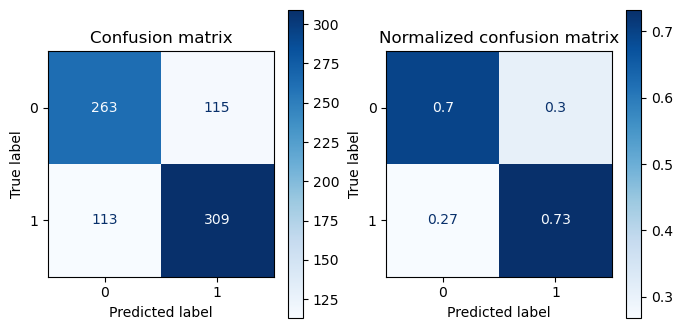

In [25]:
# dtc
prediction = Binarizer(threshold=0.47619047619047616).fit_transform(prediction_prob_class1)
get_evaluation(y_test, prediction, grid_dt_classifier, X_test)


오차 행렬
[[254 124]
 [ 83 339]]
정확도: 0.7412, 정밀도: 0.7322, 재현율: 0.8033, F1:0.7661, AUC:0.7376
###########################################################################


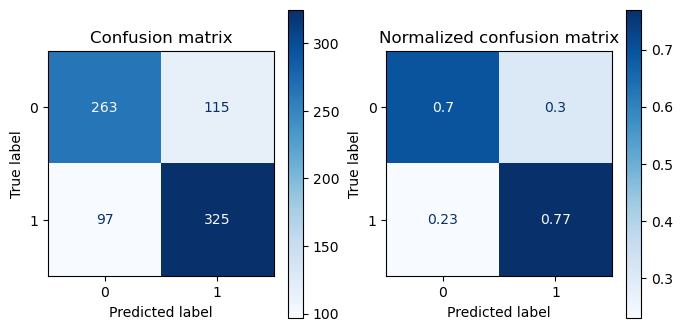

In [26]:
# svc
prediction = Binarizer(threshold=0.44365198336980655).fit_transform(prediction_prob_class1)
get_evaluation(y_test, prediction, grid_svc_classifier, X_test)


오차 행렬
[[247 131]
 [ 78 344]]
정확도: 0.7388, 정밀도: 0.7242, 재현율: 0.8152, F1:0.7670, AUC:0.7343
###########################################################################


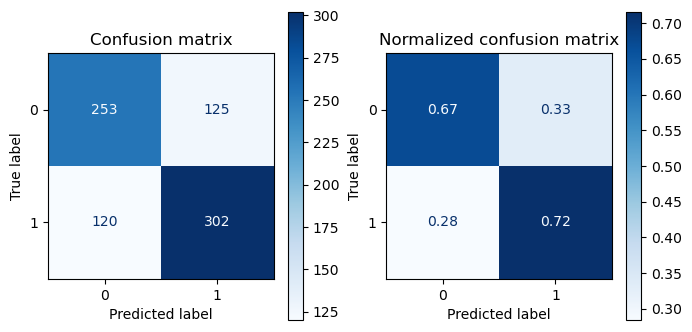

In [28]:
# knn
prediction = Binarizer(threshold=0.42857142857142855).fit_transform(prediction_prob_class1)
get_evaluation(y_test, prediction, grid_knn_classifier, X_test)

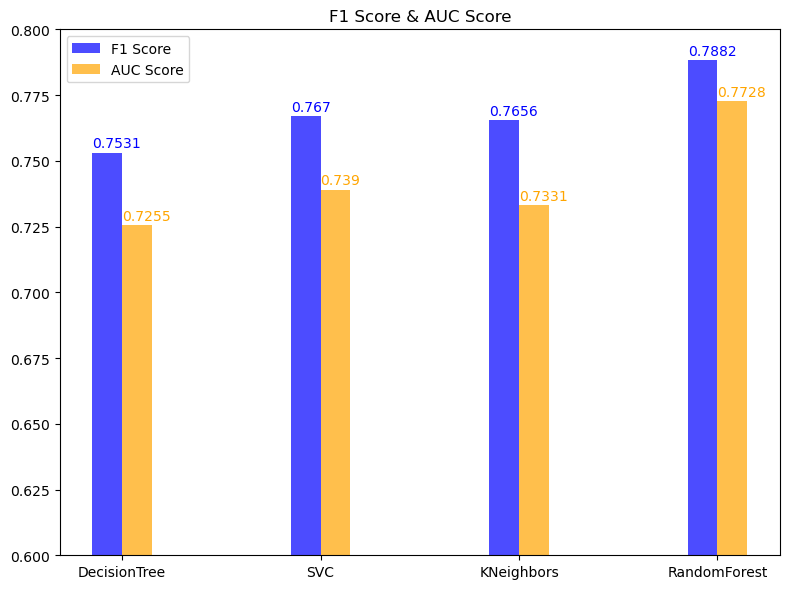

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# 모델 이름과 해당 F1 스코어, AUC 스코어를 리스트로 저장
model_names = ["DecisionTree", "SVC", "KNeighbors", "RandomForest"]
f1_scores = [0.7531, 0.7670, 0.7656, 0.7882]
auc_scores = [0.7255, 0.7390, 0.7331, 0.7728]

# 그래프 설정
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.15
index = np.arange(len(model_names))

# F1 스코어 막대 그래프
bar1 = ax.bar(index, f1_scores, bar_width, label='F1 Score', color='blue', alpha=0.7)
for i, v in enumerate(f1_scores):
    ax.text(i - bar_width/2, v + 0.002, str(v), color='blue')

# AUC 스코어 막대 그래프
bar2 = ax.bar(index + bar_width, auc_scores, bar_width, label='AUC Score', color='orange', alpha=0.7)
for i, v in enumerate(auc_scores):
    ax.text(i + bar_width/2, v + 0.002, str(v), color='orange')

# x축 레이블 설정
ax.set_title('F1 Score & AUC Score')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names)

# 범례 표시
ax.legend()
# y축 범위 설정
ax.set_ylim(0.6, 0.8)

plt.tight_layout()
plt.show()